In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

sys.path.append('./../')
from src.dataset import VehiclePredictorDataset
from src.utils import plot_images

/nethome/aprabakaran3/miniconda3/envs/dl_proj/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Config variables (can be moved to yml later)

In [3]:
root_path = './../'
data_path = os.path.join(root_path, 'data')
dataset_path = os.path.join(data_path, 'VMMRdb')
with open(os.path.join(data_path, 'make_model_most_common_100.pkl'), 'rb') as f:
    target_make_model_labels = pickle.load(f)

## Init the Dataset

In [4]:
vp_dataset = VehiclePredictorDataset(root_dir=dataset_path)
num_images = len(vp_dataset)
print(f"num_images: {num_images}")

num_images: 285086


## Plot a few example images

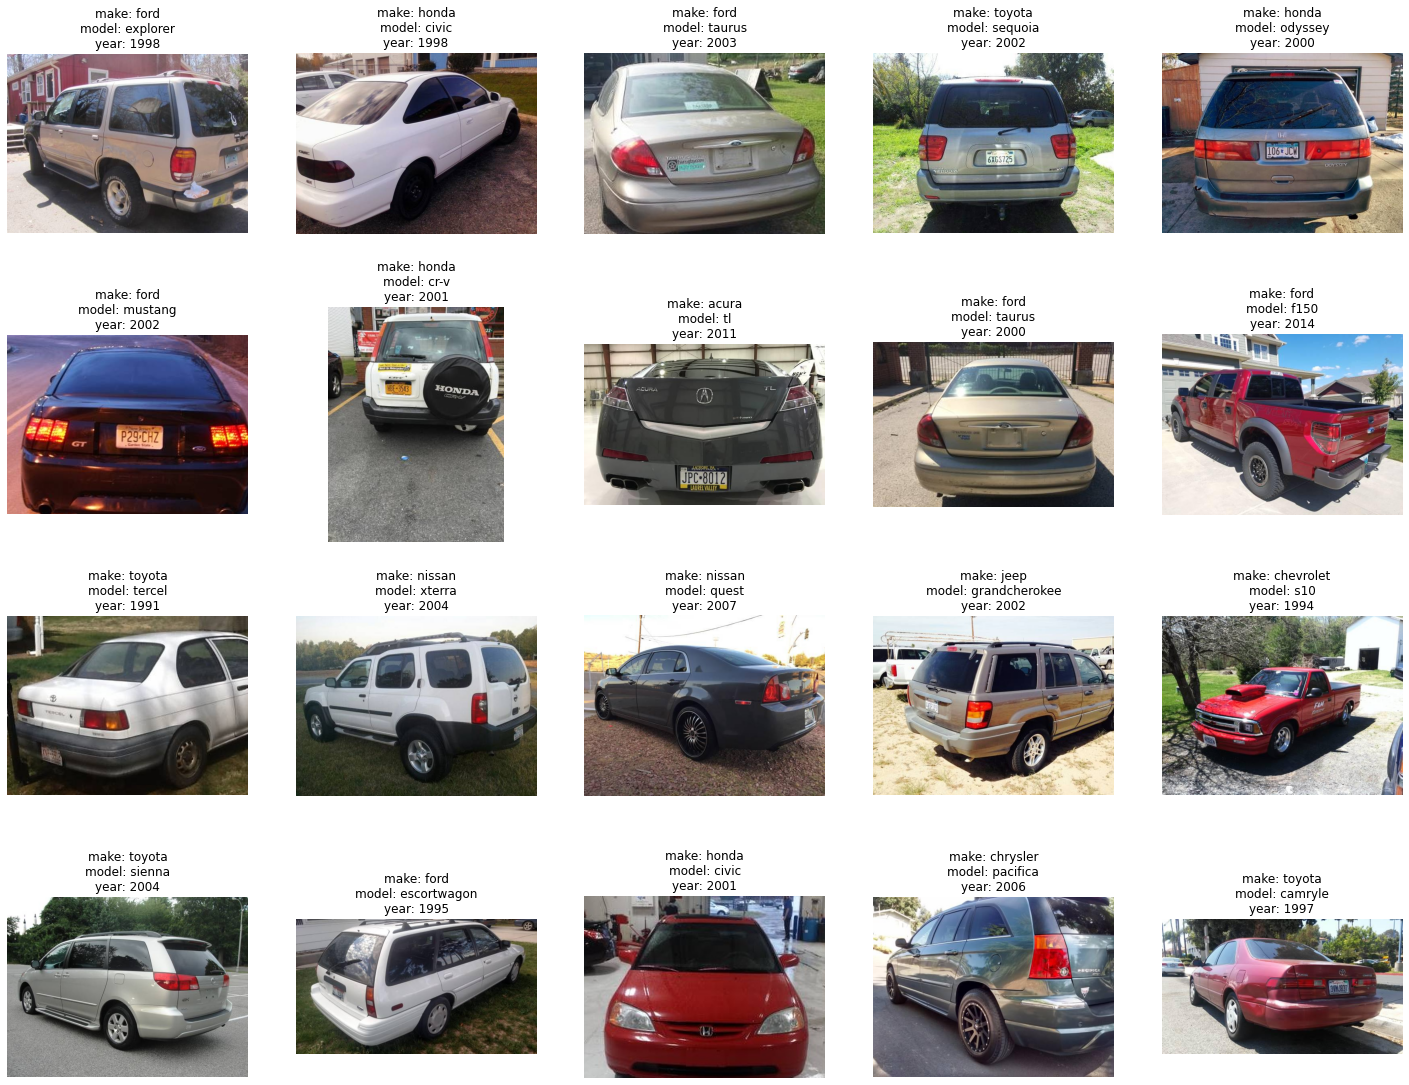

In [5]:
num_samples = 20
np.random.seed(42)
indices = np.random.choice(num_images, num_samples)
images = [vp_dataset[i][0] for i in indices]
targets = [vp_dataset[i][1] for i in indices]
titles = [f"make: {vp_dataset.idx_to_make[target['make']]}\nmodel: {vp_dataset.idx_to_model[target['model']]}\nyear: {vp_dataset.idx_to_year[target['year']]}" for target in targets]
plot_images(images, titles)

In [6]:
make_counts = Counter(vp_dataset.make_counts)
make_model_counts = Counter(vp_dataset.make_model_counts)
make_model_year_counts = Counter(vp_dataset.make_model_year_counts)
year_counts = Counter(vp_dataset.year_counts)

### Dumping target labels for later use

In [7]:
make_model_most_common_100 = [make_model[0] for make_model in make_model_counts.most_common(100)]
make_model_most_common_200 = [make_model[0] for make_model in make_model_counts.most_common(200)]
make_model_most_common_300 = [make_model[0] for make_model in make_model_counts.most_common(300)]

with open(os.path.join(data_path, 'make_model_most_common_100.pkl'), 'wb') as f_100:
    pickle.dump(make_model_most_common_100, f_100)
    
with open(os.path.join(data_path, 'make_model_most_common_200.pkl'), 'wb') as f_200:
    pickle.dump(make_model_most_common_200, f_200)
    
with open(os.path.join(data_path, 'make_model_most_common_300.pkl'), 'wb') as f_300:
    pickle.dump(make_model_most_common_300, f_300)

"\nwith open(os.path.join(data_path, 'make_model_most_common_100.pkl'), 'wb') as f_100:\n    pickle.dump(make_model_most_common_100, f_100)\n    \nwith open(os.path.join(data_path, 'make_model_most_common_200.pkl'), 'wb') as f_200:\n    pickle.dump(make_model_most_common_200, f_200)\n    \nwith open(os.path.join(data_path, 'make_model_most_common_300.pkl'), 'wb') as f_300:\n    pickle.dump(make_model_most_common_300, f_300)\n"

In [21]:
dataset_size = 0
for key, value in make_model_counts.most_common(100):
    dataset_size += value
print(f"dataset size for top-100: {dataset_size}")
print(f"Most frequent: {make_model_counts.most_common(100)[0]}")
print(f"Least frequent: {make_model_counts.most_common(100)[-1]}")

dataset_size = 0
for key, value in make_model_counts.most_common(200):
    dataset_size += value
print(f"dataset size for top-200: {dataset_size}")
print(f"Most frequent: {make_model_counts.most_common(200)[0]}")
print(f"Least frequent: {make_model_counts.most_common(200)[-1]}")

dataset_size = 0
for key, value in make_model_counts.most_common(300):
    dataset_size += value
print(f"dataset size for top-300: {dataset_size}")
print(f"Most frequent: {make_model_counts.most_common(300)[0]}")
print(f"Least frequent: {make_model_counts.most_common(300)[-1]}")

dataset size for top-100: 184985
Most frequent: ('honda_civic', 6895)
Least frequent: ('mitsubishi_lancer', 774)
dataset size for top-200: 231245
Most frequent: ('honda_civic', 6895)
Least frequent: ('ford_escort', 315)
dataset size for top-300: 254784
Most frequent: ('honda_civic', 6895)
Least frequent: ('acura_cl', 169)
